# 1.iii. Kernal PCA
## Name    : Gobinath Periyasamy
## Roll No : CS21M501

In [81]:
#importing necessary libraries
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sys
from sklearn.datasets import make_moons
from scipy.spatial.distance import pdist, squareform

# A. Kernal PCA for the function . κ(x, y) = (1 + x.T@ y)**2
## d = 2

In [82]:
data = pd.read_csv("Dataset.csv",header = None,prefix= 'Column_')
X = data.to_numpy()

In [83]:
X

array([[ 0.143  ,  0.98493],
       [-0.30467,  0.98562],
       [ 0.46625, -0.84003],
       ...,
       [ 6.1062 , -5.9864 ],
       [-7.4094 , -5.5205 ],
       [-0.12948, -8.8036 ]])

In [84]:
euclidean_distance = pdist(X, 'sqeuclidean')#computes pairwise euclidean distance betwwen the vectors
distance_matrix= squareform(euclidean_distance)
distance_matrix

array([[  0.        ,   0.20040891,   3.43496956, ...,  84.15919621,
         99.35936524,  95.88956491],
       [  0.20040891,   0.        ,   3.92731557, ...,  89.70831704,
         92.80678583,  95.85951974],
       [  3.43496956,   3.92731557,   0.        , ...,  58.29416018,
         83.93266234,  63.77334138],
       ...,
       [ 84.15919621,  89.70831704,  58.29416018, ...,   0.        ,
        182.88850617,  46.8203209 ],
       [ 99.35936524,  92.80678583,  83.93266234, ..., 182.88850617,
          0.        ,  63.77598082],
       [ 95.88956491,  95.85951974,  63.77334138, ...,  46.8203209 ,
         63.77598082,   0.        ]])

In [85]:
gamma = 1
#K = (1 + ((X)@ (X.T)))**2 
#K
K = (1+np.dot(X,X.transpose()))**2

In [86]:
#Centering the kernel matrix
N = K.shape[0] # number of samples
ones = np.ones((N,N)) / N
K = K - ones @ K - K @ ones + ones @ K @ ones

In [87]:
#Calculate eigenvalues and eigenvectors of kernel matrix
n_components = 2
eigenvals, eigenvecs = LA.eigh(K)
eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:, ::-1]    
# Collect the top k eigenvectors (projected examples)
principal_components= np.column_stack([eigenvecs[:, i] for i in range(n_components)])

In [88]:
eigenvecs

array([[-0.0216369 , -0.00218602,  0.02203242, ..., -0.01023226,
         0.00815205,  0.0162602 ],
       [-0.02193616, -0.00284154,  0.02147589, ..., -0.30899416,
         0.42970109, -0.08831636],
       [-0.02234344, -0.00269801,  0.0213343 , ...,  0.29505078,
         0.32748743,  0.07387296],
       ...,
       [-0.00159556, -0.05550981, -0.07025395, ..., -0.01021892,
         0.00995634,  0.06203521],
       [ 0.05062236,  0.08371748, -0.01749212, ..., -0.0096864 ,
         0.02921673,  0.02641648],
       [ 0.07297801, -0.04128522,  0.01032308, ..., -0.00399746,
        -0.00256813,  0.04264697]])

In [89]:
#Normalization
principal_components = principal_components / np.sqrt(eigenvals[:n_components] *N)

In [90]:
#Project the data onto top 2 eigenvectors
projected_data = np.dot(K , principal_components )

<AxesSubplot:>

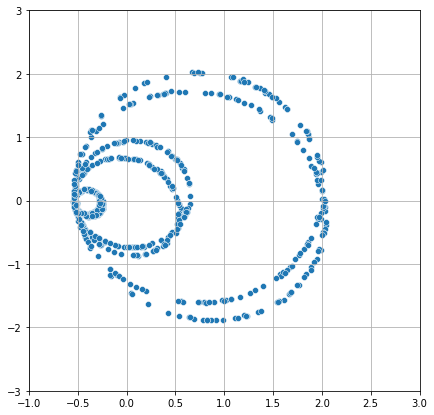

In [91]:
plt.figure(figsize = (7,7))
plt.grid()
plt.xlim(-1,3)
plt.ylim(-3,3)
sb.scatterplot(x = projected_data[:,0], y = projected_data[:,1], palette= 'Accent')

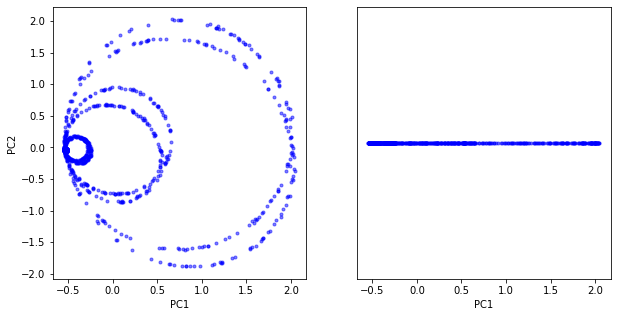

In [92]:
#Visualiation
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', marker='.', alpha=0.5)
#ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', marker='.', alpha=0.5)
#ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.show()

# A. Kernal PCA for the function . κ(x, y) = (1 + x.T@ y)**3
## d=3 

In [93]:
data = pd.read_csv("Dataset.csv",header = None,prefix= 'Column_')
X = data.to_numpy()

In [94]:
euclidean_distance = pdist(X, 'sqeuclidean')#computes pairwise euclidean distance betwwen the vectors
distance_matrix= squareform(euclidean_distance)
distance_matrix

array([[  0.        ,   0.20040891,   3.43496956, ...,  84.15919621,
         99.35936524,  95.88956491],
       [  0.20040891,   0.        ,   3.92731557, ...,  89.70831704,
         92.80678583,  95.85951974],
       [  3.43496956,   3.92731557,   0.        , ...,  58.29416018,
         83.93266234,  63.77334138],
       ...,
       [ 84.15919621,  89.70831704,  58.29416018, ...,   0.        ,
        182.88850617,  46.8203209 ],
       [ 99.35936524,  92.80678583,  83.93266234, ..., 182.88850617,
          0.        ,  63.77598082],
       [ 95.88956491,  95.85951974,  63.77334138, ...,  46.8203209 ,
         63.77598082,   0.        ]])

In [95]:
gamma = 1
K = (1+np.dot(X,X.transpose()))**3

In [96]:
#Centering the kernel matrix
N = K.shape[0] # number of samples
ones = np.ones((N,N)) / N
K = K - ones @ K - K @ ones + ones @ K @ ones

In [97]:
#Calculate eigenvalues and eigenvectors of kernel matrix
n_components = 2
eigenvals, eigenvecs = LA.eigh(K)
eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:, ::-1]    
# Collect the top k eigenvectors (projected examples)
principal_components= np.column_stack([eigenvecs[:, i] for i in range(n_components)])

In [98]:
#Normalization
principal_components = principal_components / np.sqrt(eigenvals[:n_components] *N)

In [99]:
#Project the data onto top 2 eigenvectors
projected_data = np.dot(K , principal_components )

<AxesSubplot:>

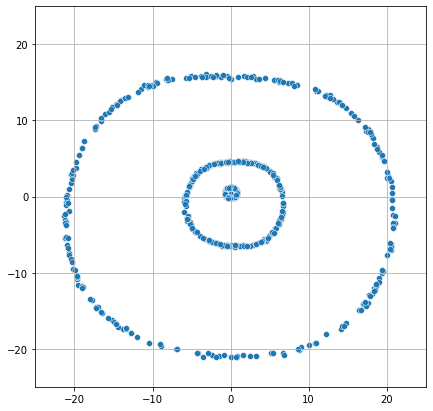

In [100]:
# Visualization:
plt.figure(figsize = (7,7))
plt.grid()
plt.xlim(-25,25)
plt.ylim(-25,25)
sb.scatterplot(x = projected_data[:,0], y = projected_data[:,1], palette= 'Accent')

[<AxesSubplot:> <AxesSubplot:>]


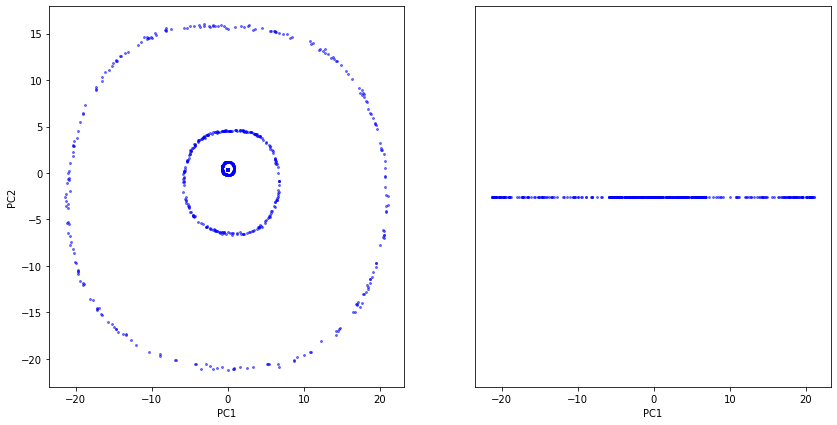

In [101]:
#Visualiation
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
print(ax)
ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', s=15, marker='.', alpha=0.5)
#ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', s= 15, marker='.', alpha=0.5)
#ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.show()

# B. Kernal PCA for the function . κ(x, y) = exp( −(x−y)T (x−y))/2sigma**2
## Sigma = 0.1

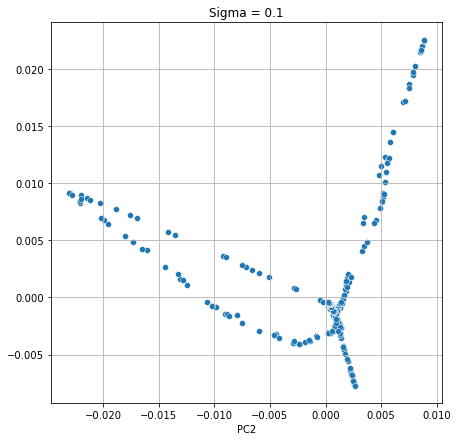

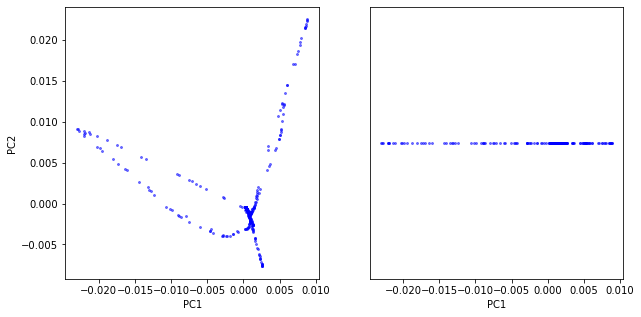

In [104]:
sig = 0.1

gamma = 1/(2*(sig**2))

Y = X.transpose()

K = np.exp(-gamma * distance_matrix)
#Centering the kernel matrix
N = K.shape[0] # number of samples
ones = np.ones((N,N)) / N
K = K - ones @ K - K @ ones + ones @ K @ ones

#Calculate eigenvalues and eigenvectors of kernel matrix
n_components = 2
eigenvals, eigenvecs = LA.eigh(K)
eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:, ::-1]    
# Collect the top k eigenvectors (projected examples)
principal_components= np.column_stack([eigenvecs[:, i] for i in range(n_components)])
principal_components = principal_components / np.sqrt(eigenvals[:n_components] *N)
projected_data = np.dot(K , principal_components )
plt.figure(figsize = (7,7))
plt.grid()
plt.xlabel('PC1')
plt.xlabel('PC2')
plt.title('Sigma = 0.1')
sb.scatterplot(x = projected_data[:,0], y = projected_data[:,1], palette= 'Accent')

#Visualiation
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', s=15, marker='.', alpha=0.5)
#ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', s= 15, marker='.', alpha=0.5)
#ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.show()

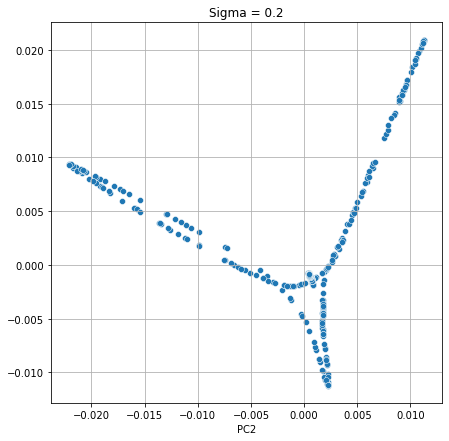

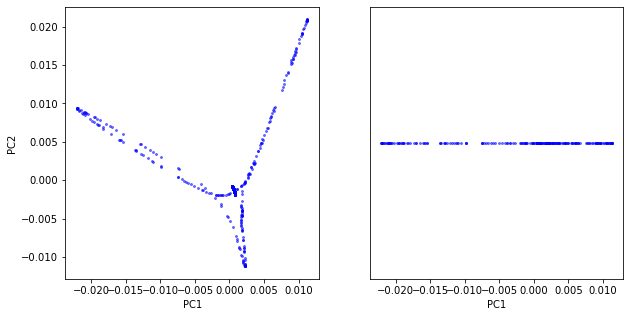

In [105]:
sig = 0.2

gamma = 1/(2*(sig**2))

Y = X.transpose()

K = np.exp(-gamma * distance_matrix)
#Centering the kernel matrix
N = K.shape[0] # number of samples
ones = np.ones((N,N)) / N
K = K - ones @ K - K @ ones + ones @ K @ ones

#Calculate eigenvalues and eigenvectors of kernel matrix
n_components = 2
eigenvals, eigenvecs = LA.eigh(K)
eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:, ::-1]    
# Collect the top k eigenvectors (projected examples)
principal_components= np.column_stack([eigenvecs[:, i] for i in range(n_components)])
principal_components = principal_components / np.sqrt(eigenvals[:n_components] *N)
projected_data = np.dot(K , principal_components )
plt.figure(figsize = (7,7))
plt.grid()
plt.xlabel('PC1')
plt.xlabel('PC2')
plt.title('Sigma = 0.2')
sb.scatterplot(x = projected_data[:,0], y = projected_data[:,1], palette= 'Accent')

#Visualiation
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', s=15, marker='.', alpha=0.5)
#ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', s= 15, marker='.', alpha=0.5)
#ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.show()

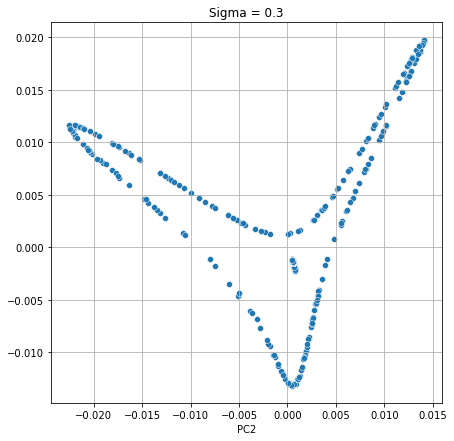

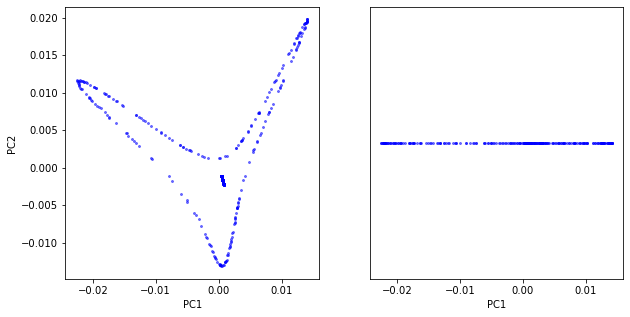

In [106]:
sig = 0.3

gamma = 1/(2*(sig**2))

Y = X.transpose()

K = np.exp(-gamma * distance_matrix)
#Centering the kernel matrix
N = K.shape[0] # number of samples
ones = np.ones((N,N)) / N
K = K - ones @ K - K @ ones + ones @ K @ ones

#Calculate eigenvalues and eigenvectors of kernel matrix
n_components = 2
eigenvals, eigenvecs = LA.eigh(K)
eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:, ::-1]    
# Collect the top k eigenvectors (projected examples)
principal_components= np.column_stack([eigenvecs[:, i] for i in range(n_components)])
principal_components = principal_components / np.sqrt(eigenvals[:n_components] *N)
projected_data = np.dot(K , principal_components )
plt.figure(figsize = (7,7))
plt.grid()
plt.xlabel('PC1')
plt.xlabel('PC2')
plt.title('Sigma = 0.3')
sb.scatterplot(x = projected_data[:,0], y = projected_data[:,1], palette= 'Accent')

#Visualiation
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', s=15, marker='.', alpha=0.5)
#ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', s= 15, marker='.', alpha=0.5)
#ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.show()

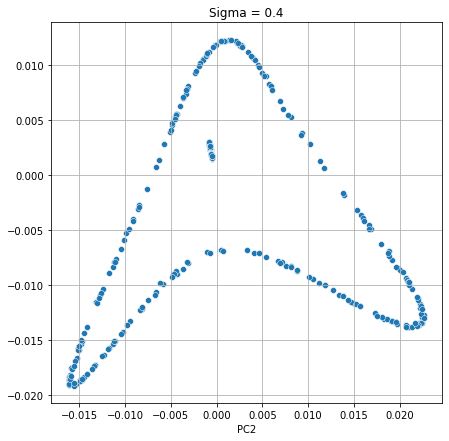

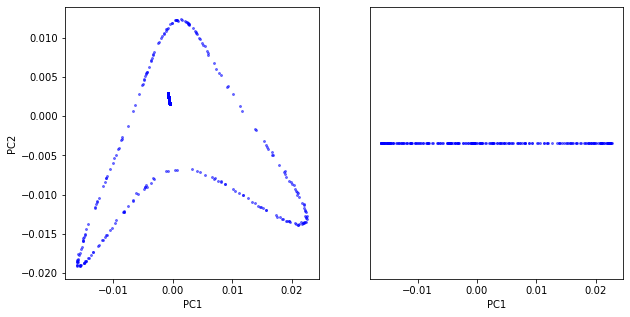

In [107]:
sig = 0.4

gamma = 1/(2*(sig**2))

Y = X.transpose()

K = np.exp(-gamma * distance_matrix)
#Centering the kernel matrix
N = K.shape[0] # number of samples
ones = np.ones((N,N)) / N
K = K - ones @ K - K @ ones + ones @ K @ ones

#Calculate eigenvalues and eigenvectors of kernel matrix
n_components = 2
eigenvals, eigenvecs = LA.eigh(K)
eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:, ::-1]    
# Collect the top k eigenvectors (projected examples)
principal_components= np.column_stack([eigenvecs[:, i] for i in range(n_components)])
principal_components = principal_components / np.sqrt(eigenvals[:n_components] *N)
projected_data = np.dot(K , principal_components )
plt.figure(figsize = (7,7))
plt.grid()
plt.xlabel('PC1')
plt.xlabel('PC2')
plt.title('Sigma = 0.4')
sb.scatterplot(x = projected_data[:,0], y = projected_data[:,1], palette= 'Accent')

#Visualiation
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', s=15, marker='.', alpha=0.5)
#ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', s= 15, marker='.', alpha=0.5)
#ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.show()

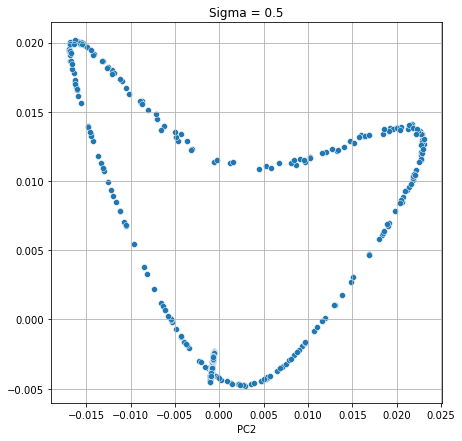

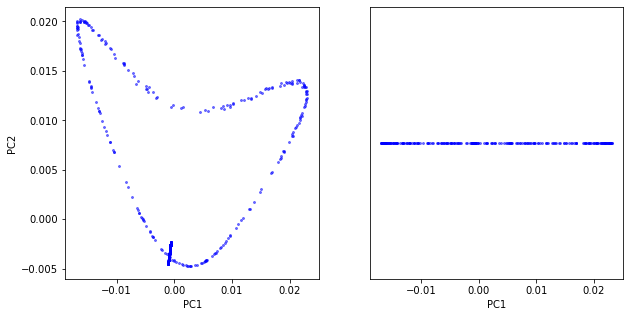

In [108]:
sig = 0.5

gamma = 1/(2*(sig**2))

Y = X.transpose()

K = np.exp(-gamma * distance_matrix)
#Centering the kernel matrix
N = K.shape[0] # number of samples
ones = np.ones((N,N)) / N
K = K - ones @ K - K @ ones + ones @ K @ ones

#Calculate eigenvalues and eigenvectors of kernel matrix
n_components = 2
eigenvals, eigenvecs = LA.eigh(K)
eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:, ::-1]    
# Collect the top k eigenvectors (projected examples)
principal_components= np.column_stack([eigenvecs[:, i] for i in range(n_components)])
principal_components = principal_components / np.sqrt(eigenvals[:n_components] *N)
projected_data = np.dot(K , principal_components )
plt.figure(figsize = (7,7))
plt.grid()
plt.xlabel('PC1')
plt.xlabel('PC2')
plt.title('Sigma = 0.5')
sb.scatterplot(x = projected_data[:,0], y = projected_data[:,1], palette= 'Accent')

#Visualiation
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', s=15, marker='.', alpha=0.5)
#ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', s= 15, marker='.', alpha=0.5)
#ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.show()

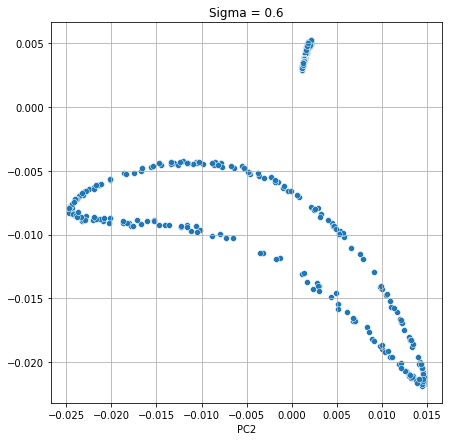

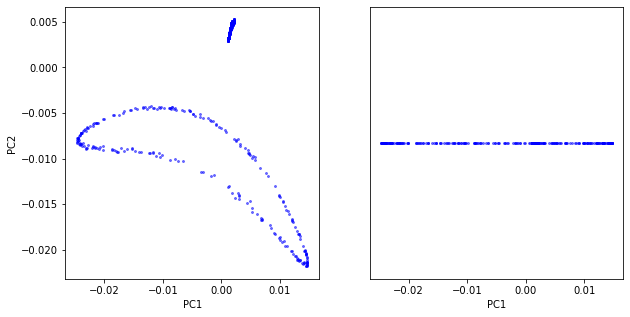

In [109]:
sig = 0.6

gamma = 1/(2*(sig**2))

Y = X.transpose()

K = np.exp(-gamma * distance_matrix)
#Centering the kernel matrix
N = K.shape[0] # number of samples
ones = np.ones((N,N)) / N
K = K - ones @ K - K @ ones + ones @ K @ ones

#Calculate eigenvalues and eigenvectors of kernel matrix
n_components = 2
eigenvals, eigenvecs = LA.eigh(K)
eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:, ::-1]    
# Collect the top k eigenvectors (projected examples)
principal_components= np.column_stack([eigenvecs[:, i] for i in range(n_components)])
principal_components = principal_components / np.sqrt(eigenvals[:n_components] *N)
projected_data = np.dot(K , principal_components )
plt.figure(figsize = (7,7))
plt.grid()
plt.xlabel('PC1')
plt.xlabel('PC2')
plt.title('Sigma = 0.6')
sb.scatterplot(x = projected_data[:,0], y = projected_data[:,1], palette= 'Accent')

#Visualiation
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', s=15, marker='.', alpha=0.5)
#ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', s= 15, marker='.', alpha=0.5)
#ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.show()

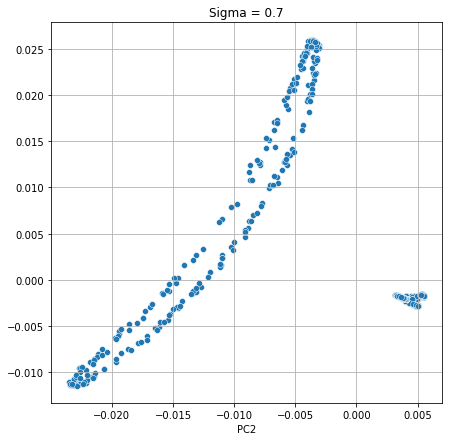

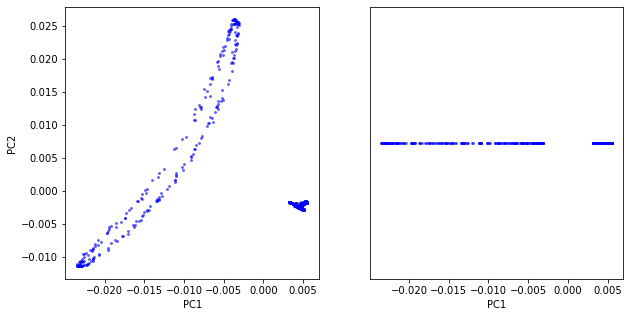

In [110]:
sig = 0.7

gamma = 1/(2*(sig**2))

Y = X.transpose()

K = np.exp(-gamma * distance_matrix)
#Centering the kernel matrix
N = K.shape[0] # number of samples
ones = np.ones((N,N)) / N
K = K - ones @ K - K @ ones + ones @ K @ ones

#Calculate eigenvalues and eigenvectors of kernel matrix
n_components = 2
eigenvals, eigenvecs = LA.eigh(K)
eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:, ::-1]    
# Collect the top k eigenvectors (projected examples)
principal_components= np.column_stack([eigenvecs[:, i] for i in range(n_components)])
principal_components = principal_components / np.sqrt(eigenvals[:n_components] *N)
projected_data = np.dot(K , principal_components )
plt.figure(figsize = (7,7))
plt.grid()
plt.xlabel('PC1')
plt.xlabel('PC2')
plt.title('Sigma = 0.7')
sb.scatterplot(x = projected_data[:,0], y = projected_data[:,1], palette= 'Accent')

#Visualiation
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', s=15, marker='.', alpha=0.5)
#ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', s= 15, marker='.', alpha=0.5)
#ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.show()

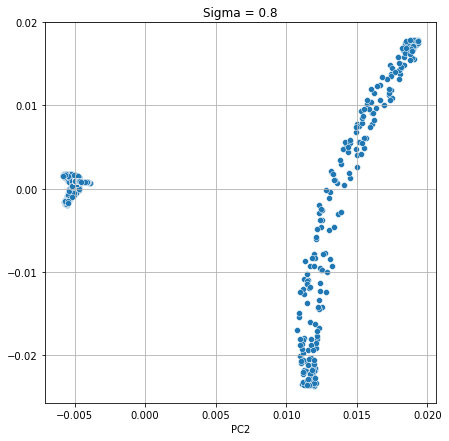

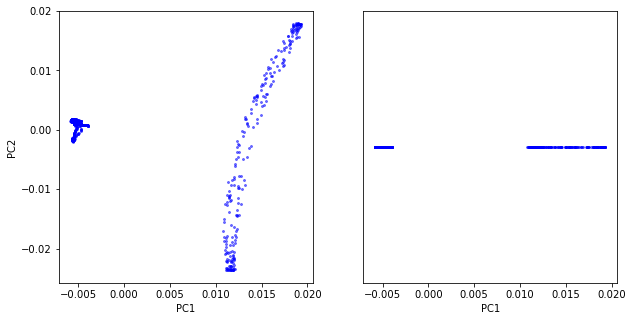

In [111]:
sig = 0.8

gamma = 1/(2*(sig**2))

Y = X.transpose()

K = np.exp(-gamma * distance_matrix)
#Centering the kernel matrix
N = K.shape[0] # number of samples
ones = np.ones((N,N)) / N
K = K - ones @ K - K @ ones + ones @ K @ ones

#Calculate eigenvalues and eigenvectors of kernel matrix
n_components = 2
eigenvals, eigenvecs = LA.eigh(K)
eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:, ::-1]    
# Collect the top k eigenvectors (projected examples)
principal_components= np.column_stack([eigenvecs[:, i] for i in range(n_components)])
principal_components = principal_components / np.sqrt(eigenvals[:n_components] *N)
projected_data = np.dot(K , principal_components )
plt.figure(figsize = (7,7))
plt.grid()
plt.xlabel('PC1')
plt.xlabel('PC2')
plt.title('Sigma = 0.8')
sb.scatterplot(x = projected_data[:,0], y = projected_data[:,1], palette= 'Accent')

#Visualiation
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', s=15, marker='.', alpha=0.5)
#ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', s= 15, marker='.', alpha=0.5)
#ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.show()

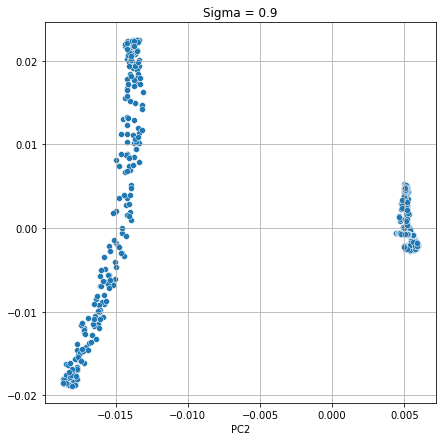

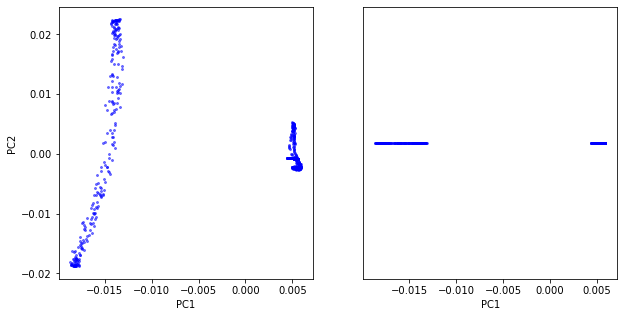

In [112]:
sig = 0.9

gamma = 1/(2*(sig**2))

Y = X.transpose()

K = np.exp(-gamma * distance_matrix)
#Centering the kernel matrix
N = K.shape[0] # number of samples
ones = np.ones((N,N)) / N
K = K - ones @ K - K @ ones + ones @ K @ ones

#Calculate eigenvalues and eigenvectors of kernel matrix
n_components = 2
eigenvals, eigenvecs = LA.eigh(K)
eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:, ::-1]    
# Collect the top k eigenvectors (projected examples)
principal_components= np.column_stack([eigenvecs[:, i] for i in range(n_components)])
principal_components = principal_components / np.sqrt(eigenvals[:n_components] *N)
projected_data = np.dot(K , principal_components )
plt.figure(figsize = (7,7))
plt.xlabel('PC1')
plt.xlabel('PC2')
plt.title('Sigma = 0.9')
plt.grid()
sb.scatterplot(x = projected_data[:,0], y = projected_data[:,1], palette= 'Accent')

#Visualiation
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', s=15, marker='.', alpha=0.5)
#ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', s= 15, marker='.', alpha=0.5)
#ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.show()

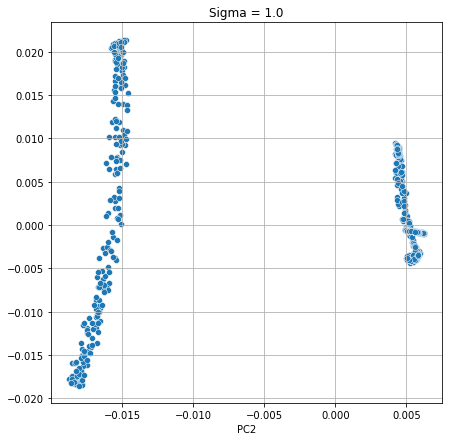

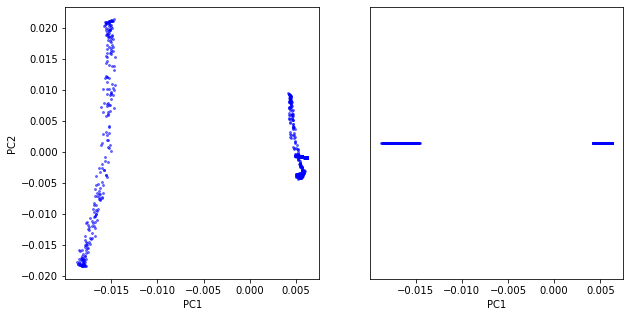

In [113]:
sig = 1.0

gamma = 1/(2*(sig**2))

Y = X.transpose()

K = np.exp(-gamma * distance_matrix)
#Centering the kernel matrix
N = K.shape[0] # number of samples
ones = np.ones((N,N)) / N
K = K - ones @ K - K @ ones + ones @ K @ ones

#Calculate eigenvalues and eigenvectors of kernel matrix
n_components = 2
eigenvals, eigenvecs = LA.eigh(K)
eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:, ::-1]    
# Collect the top k eigenvectors (projected examples)
principal_components= np.column_stack([eigenvecs[:, i] for i in range(n_components)])
principal_components = principal_components / np.sqrt(eigenvals[:n_components] *N)
projected_data = np.dot(K , principal_components )
plt.figure(figsize = (7,7))
plt.grid()
plt.xlabel('PC1')
plt.xlabel('PC2')
plt.title('Sigma = 1.0')
sb.scatterplot(x = projected_data[:,0], y = projected_data[:,1], palette= 'Accent')

#Visualiation
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', s=15, marker='.', alpha=0.5)
#ax[0].scatter(projected_data[:, 0], projected_data[:, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', s= 15, marker='.', alpha=0.5)
#ax[1].scatter(projected_data[:, 0], np.zeros((1000,1)), color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.show()